In [2]:
import pandas as pd

df = pd.read_csv('results/test_MEDQA_predictions.csv')
df['nct_number'] = df['file_path'].str.extract(r'(NCT\d+)')
df['predicted_label_threshold'] = df['probability_fact'].apply(lambda x: 'fact' if x > 0.2 else 'hallucination')
letters = ['A', 'B', 'C', 'D']
df['Choice'] = [letters[i % len(letters)] for i in range(len(df))]
columns = ['model_1_gold_lp_moment1', 'model_2_gold_lp_moment1','model_3_gold_lp_moment1', 'model_4_gold_lp_moment1','model_6_gold_lp_moment1', 'probability_fact', 'predicted_label', 'predicted_label_threshold','label', 'Choice', 'source_file', 'file_path', 'nct_number']
df=df[columns]
df

,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1,probability_fact,predicted_label,predicted_label_threshold,label,Choice,source_file,file_path,nct_number
0,-0.437432,-0.328541,-0.188097,-0.181567,-0.323295,0.971863,fact,fact,hallucination,A,logprob_matrix_1.csv,NCT00001/logprob_matrix_1.csv,NCT00001
1,-1.226612,-0.721914,-0.232090,-0.847654,-1.044253,0.010839,hallucination,hallucination,fact,B,logprob_matrix_2.csv,NCT00001/logprob_matrix_2.csv,NCT00001
2,-1.379453,-1.200246,-0.451768,-1.239255,-1.537369,0.000886,hallucination,hallucination,hallucination,C,logprob_matrix_3.csv,NCT00001/logprob_matrix_3.csv,NCT00001
3,-2.144122,-1.712598,-0.381653,-1.205340,-2.129192,0.000114,hallucination,hallucination,hallucination,D,logprob_matrix_4.csv,NCT00001/logprob_matrix_4.csv,NCT00001
4,-2.151101,-1.432596,-1.443229,-1.123503,-1.498745,0.002610,hallucination,hallucination,hallucination,A,logprob_matrix_1.csv,NCT00002/logprob_matrix_1.csv,NCT00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,-3.925499,-2.988518,-2.254831,-2.307956,-2.901598,0.000330,hallucination,hallucination,hallucination,D,logprob_matrix_4.csv,NCT01272/logprob_matrix_4.csv,NCT01272
5088,-3.594638,-3.740725,-2.670742,-3.368949,-3.860343,0.000200,hallucination,hallucination,hallucination,A,logprob_matrix_1.csv,NCT01273/logprob_matrix_1.csv,NCT01273
5089,-2.102511,-1.796383,-1.250972,-1.482495,-1.917090,0.000138,hallucination,hallucination,hallucination,B,logprob_matrix_2.csv,NCT01273/logprob_matrix_2.csv,NCT01273
5090,-0.421315,-0.785424,-1.147421,-0.588387,-0.802748,0.998675,fact,fact,fact,C,logprob_matrix_3.csv,NCT01273/logprob_matrix_3.csv,NCT01273


## Max probability FACT

In [3]:
# Extract NCT number and group by it
# df_result['nct_number'] = df_result['file_path'].str.extract(r'(NCT\d+)')
selected_df = df.loc[df.groupby('nct_number')['probability_fact'].idxmax()]
selected_df['predicted_fact_label'] = 'fact'
selected_df = selected_df.reset_index(drop=True)
col = ['nct_number', 'file_path', 'probability_fact', 'label', 'Choice']
selected_df

,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1,probability_fact,predicted_label,predicted_label_threshold,label,Choice,source_file,file_path,nct_number,predicted_fact_label
0,-0.437432,-0.328541,-0.188097,-0.181567,-0.323295,0.971863,fact,fact,hallucination,A,logprob_matrix_1.csv,NCT00001/logprob_matrix_1.csv,NCT00001,fact
1,-1.428837,-1.076655,-0.952474,-0.724643,-1.068757,0.688300,fact,fact,fact,D,logprob_matrix_4.csv,NCT00002/logprob_matrix_4.csv,NCT00002,fact
2,-1.403883,-0.539902,-0.300282,-0.143163,-0.667403,0.998527,fact,fact,fact,B,logprob_matrix_2.csv,NCT00003/logprob_matrix_2.csv,NCT00003,fact
3,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245,0.907351,fact,fact,hallucination,B,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,NCT00004,fact
4,-1.115848,-0.914495,-0.611476,-0.636955,-1.029139,0.997205,fact,fact,fact,B,logprob_matrix_2.csv,NCT00005/logprob_matrix_2.csv,NCT00005,fact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,-1.031048,-0.553803,-1.487469,-0.599806,-0.579990,0.959419,fact,fact,fact,D,logprob_matrix_4.csv,NCT01269/logprob_matrix_4.csv,NCT01269,fact
1269,-1.751377,-0.857468,-0.760169,-0.067396,-1.406612,0.892118,fact,fact,hallucination,C,logprob_matrix_3.csv,NCT01270/logprob_matrix_3.csv,NCT01270,fact
1270,-1.408896,-1.055260,-0.630361,-1.053698,-1.351466,0.700840,fact,fact,fact,B,logprob_matrix_2.csv,NCT01271/logprob_matrix_2.csv,NCT01271,fact
1271,-1.062843,-0.944483,-0.057626,-0.172013,-0.948508,0.995364,fact,fact,fact,C,logprob_matrix_3.csv,NCT01272/logprob_matrix_3.csv,NCT01272,fact


## GPT-4o

In [5]:
df_gpt = pd.read_csv('results/medqa_predictions_gpt-4o.csv')
df_gpt

,nct_number,gpt-predicted_label,true_label
0,NCT00001,A,B
1,NCT00002,D,D
2,NCT00003,B,B
3,NCT00004,D,D
4,NCT00005,B,B
...,...,...,...
1268,NCT01269,D,D
1269,NCT01270,D,D
1270,NCT01271,B,B
1271,NCT01272,C,C


## Add Gpt4o to dataframe

In [4]:
selected_df['gpt_predicted_choice'] = df_gpt['gpt-predicted_label']
selected_df['true_label_choice'] = df_gpt['true_label']
col = ['nct_number', 'file_path', 'probability_fact', 'predicted_label_threshold', 'label', 'Choice', 'gpt_predicted_choice', 'true_label_choice']
selected_df[col]

,nct_number,file_path,probability_fact,predicted_label_threshold,label,Choice,gpt_predicted_choice,true_label_choice
0,NCT00001,NCT00001/logprob_matrix_1.csv,0.971863,fact,hallucination,A,A,B
1,NCT00002,NCT00002/logprob_matrix_4.csv,0.688300,fact,fact,D,D,D
2,NCT00003,NCT00003/logprob_matrix_2.csv,0.998527,fact,fact,B,B,B
3,NCT00004,NCT00004/logprob_matrix_2.csv,0.907351,fact,hallucination,B,D,D
4,NCT00005,NCT00005/logprob_matrix_2.csv,0.997205,fact,fact,B,B,B
...,...,...,...,...,...,...,...,...
1268,NCT01269,NCT01269/logprob_matrix_4.csv,0.959419,fact,fact,D,D,D
1269,NCT01270,NCT01270/logprob_matrix_3.csv,0.892118,fact,hallucination,C,D,D
1270,NCT01271,NCT01271/logprob_matrix_2.csv,0.700840,fact,fact,B,B,B
1271,NCT01272,NCT01272/logprob_matrix_3.csv,0.995364,fact,fact,C,C,C


## Add Gpt4o-cot to dataframe

In [5]:
df_gpt_cot = pd.read_csv('results/medqa_predictions_gpt-4o-COT.csv')
selected_df['gpt_cot_predicted_choice'] = df_gpt_cot['gpt-predicted_label']
col = ['nct_number', 'file_path', 'probability_fact', 'predicted_label_threshold', 'label', 'Choice', 'gpt_predicted_choice', 'gpt_cot_predicted_choice', 'true_label_choice']
selected_df[col]

,nct_number,file_path,probability_fact,predicted_label_threshold,label,Choice,gpt_predicted_choice,gpt_cot_predicted_choice,true_label_choice
0,NCT00001,NCT00001/logprob_matrix_1.csv,0.971863,fact,hallucination,A,A,A,B
1,NCT00002,NCT00002/logprob_matrix_4.csv,0.688300,fact,fact,D,D,D,D
2,NCT00003,NCT00003/logprob_matrix_2.csv,0.998527,fact,fact,B,B,B,B
3,NCT00004,NCT00004/logprob_matrix_2.csv,0.907351,fact,hallucination,B,D,D,D
4,NCT00005,NCT00005/logprob_matrix_2.csv,0.997205,fact,fact,B,B,B,B
...,...,...,...,...,...,...,...,...,...
1268,NCT01269,NCT01269/logprob_matrix_4.csv,0.959419,fact,fact,D,D,D,D
1269,NCT01270,NCT01270/logprob_matrix_3.csv,0.892118,fact,hallucination,C,D,D,D
1270,NCT01271,NCT01271/logprob_matrix_2.csv,0.700840,fact,fact,B,B,B,B
1271,NCT01272,NCT01272/logprob_matrix_3.csv,0.995364,fact,fact,C,C,C,C


## Add Gpt4o-Search to dataframe

In [6]:
df_gpt_search = pd.read_csv('results/medqa_predictions_gpt-4o-search.csv')
df_gpt_search

,nct_number,gpt-predicted_label,true_label
0,NCT00001,A,B
1,NCT00002,D,D
2,NCT00003,B,B
3,NCT00004,D,D
4,NCT00005,B,B
...,...,...,...
1268,NCT01269,D,D
1269,NCT01270,D,D
1270,NCT01271,B,B
1271,NCT01272,C,C


In [7]:
selected_df['gpt_search_predicted_choice'] = df_gpt_search['gpt-predicted_label']
col = ['nct_number', 'file_path', 'probability_fact', 'predicted_label_threshold', 'label', 'Choice', 'gpt_predicted_choice', 'gpt_cot_predicted_choice', 'gpt_search_predicted_choice', 'true_label_choice']
selected_df[col]

,nct_number,file_path,probability_fact,predicted_label_threshold,label,Choice,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice
0,NCT00001,NCT00001/logprob_matrix_1.csv,0.971863,fact,hallucination,A,A,A,A,B
1,NCT00002,NCT00002/logprob_matrix_4.csv,0.688300,fact,fact,D,D,D,D,D
2,NCT00003,NCT00003/logprob_matrix_2.csv,0.998527,fact,fact,B,B,B,B,B
3,NCT00004,NCT00004/logprob_matrix_2.csv,0.907351,fact,hallucination,B,D,D,D,D
4,NCT00005,NCT00005/logprob_matrix_2.csv,0.997205,fact,fact,B,B,B,B,B
...,...,...,...,...,...,...,...,...,...,...
1268,NCT01269,NCT01269/logprob_matrix_4.csv,0.959419,fact,fact,D,D,D,D,D
1269,NCT01270,NCT01270/logprob_matrix_3.csv,0.892118,fact,hallucination,C,D,D,D,D
1270,NCT01271,NCT01271/logprob_matrix_2.csv,0.700840,fact,fact,B,B,B,B,B
1271,NCT01272,NCT01272/logprob_matrix_3.csv,0.995364,fact,fact,C,C,C,C,C


In [8]:
column_to_save = ["nct_number", "probability_fact", "predicted_label", "predicted_label_threshold", "label", "Choice", "predicted_fact_label", "gpt_predicted_choice", 'gpt_cot_predicted_choice', "gpt_search_predicted_choice", "true_label_choice", "source_file", "file_path", "model_1_gold_lp_moment1", "model_2_gold_lp_moment1", "model_3_gold_lp_moment1",	"model_4_gold_lp_moment1",	"model_6_gold_lp_moment1"]
selected_df[column_to_save]

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
0,NCT00001,0.971863,fact,fact,hallucination,A,fact,A,A,A,B,logprob_matrix_1.csv,NCT00001/logprob_matrix_1.csv,-0.437432,-0.328541,-0.188097,-0.181567,-0.323295
1,NCT00002,0.688300,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT00002/logprob_matrix_4.csv,-1.428837,-1.076655,-0.952474,-0.724643,-1.068757
2,NCT00003,0.998527,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00003/logprob_matrix_2.csv,-1.403883,-0.539902,-0.300282,-0.143163,-0.667403
3,NCT00004,0.907351,fact,fact,hallucination,B,fact,D,D,D,D,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245
4,NCT00005,0.997205,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00005/logprob_matrix_2.csv,-1.115848,-0.914495,-0.611476,-0.636955,-1.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,NCT01269,0.959419,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT01269/logprob_matrix_4.csv,-1.031048,-0.553803,-1.487469,-0.599806,-0.579990
1269,NCT01270,0.892118,fact,fact,hallucination,C,fact,D,D,D,D,logprob_matrix_3.csv,NCT01270/logprob_matrix_3.csv,-1.751377,-0.857468,-0.760169,-0.067396,-1.406612
1270,NCT01271,0.700840,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT01271/logprob_matrix_2.csv,-1.408896,-1.055260,-0.630361,-1.053698,-1.351466
1271,NCT01272,0.995364,fact,fact,fact,C,fact,C,C,C,C,logprob_matrix_3.csv,NCT01272/logprob_matrix_3.csv,-1.062843,-0.944483,-0.057626,-0.172013,-0.948508


In [9]:
selected_df[column_to_save].to_csv('results/Final_df_results.csv', index=False)

## Analysis

In [1]:
import pandas as pd

df = pd.read_csv('results/Final_df_results.csv')
df

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
0,NCT00001,0.971863,fact,fact,hallucination,A,fact,A,A,A,B,logprob_matrix_1.csv,NCT00001/logprob_matrix_1.csv,-0.437432,-0.328541,-0.188097,-0.181567,-0.323295
1,NCT00002,0.688300,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT00002/logprob_matrix_4.csv,-1.428837,-1.076655,-0.952474,-0.724643,-1.068757
2,NCT00003,0.998527,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00003/logprob_matrix_2.csv,-1.403883,-0.539902,-0.300282,-0.143163,-0.667403
3,NCT00004,0.907351,fact,fact,hallucination,B,fact,D,D,D,D,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245
4,NCT00005,0.997205,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00005/logprob_matrix_2.csv,-1.115848,-0.914495,-0.611476,-0.636955,-1.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,NCT01269,0.959419,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT01269/logprob_matrix_4.csv,-1.031048,-0.553803,-1.487469,-0.599806,-0.579990
1269,NCT01270,0.892118,fact,fact,hallucination,C,fact,D,D,D,D,logprob_matrix_3.csv,NCT01270/logprob_matrix_3.csv,-1.751377,-0.857468,-0.760169,-0.067396,-1.406612
1270,NCT01271,0.700840,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT01271/logprob_matrix_2.csv,-1.408896,-1.055260,-0.630361,-1.053698,-1.351466
1271,NCT01272,0.995364,fact,fact,fact,C,fact,C,C,C,C,logprob_matrix_3.csv,NCT01272/logprob_matrix_3.csv,-1.062843,-0.944483,-0.057626,-0.172013,-0.948508


In [2]:
# Accuracy each model vs True_label
class_acc = (df['Choice'] == df['true_label_choice']).sum()
class_gpt = (df['gpt_predicted_choice'] == df['true_label_choice']).sum()
class_gpt_cot = (df['gpt_cot_predicted_choice'] == df['true_label_choice']).sum()
class_gpt_search = (df['gpt_search_predicted_choice'] == df['true_label_choice']).sum()

tot_pred = len(df)

print("Accuracy model vs True-labels:")
print(f"Classifier: {class_acc/tot_pred:.3f} ({class_acc} correct)")
print(f"Gpt-4o: {class_gpt/tot_pred:.3f} ({class_gpt} correct)")
print(f"Gpt-4o-COT: {class_gpt_cot/tot_pred:.3f} ({class_gpt_cot} correct)")
print(f"Gpt-4o-search: {class_gpt_search/tot_pred:.3f} ({class_gpt_search} correct)")

Accuracy model vs True-labels:
Classifier: 0.792 (1008 correct)
Gpt-4o: 0.877 (1116 correct)
Gpt-4o-COT: 0.909 (1157 correct)
Gpt-4o-search: 0.895 (1139 correct)


In [17]:
## matching predictions with classifier

# Count when both columns are 'fact'
matching_gpt = (df['Choice'] == df['gpt_predicted_choice']).sum()
matching_gpt_cot = (df['Choice'] == df['gpt_cot_predicted_choice']).sum()
matching_gpt_search = (df['Choice'] == df['gpt_search_predicted_choice']).sum()
total_samples = len(df)

print('Matching_gpt:', matching_gpt)
print('Matching_gpt_cot:', matching_gpt_cot)
print('Matching_gpt_search:', matching_gpt_search)
print(f"Accuracy of predicting the right GPT answer: {matching_gpt/total_samples*100:.2f}%)")
print(f"Accuracy of predicting the right GPT-COT answer: {matching_gpt_cot/total_samples*100:.2f}%)")
print(f"Accuracy of predicting the right GPT-search answer: {matching_gpt_search/total_samples*100:.2f}%)")

Matching_gpt: 1038
Matching_gpt_cot: 1032
Matching_gpt_search: 1038
Accuracy of predicting the right GPT answer: 81.54%)
Accuracy of predicting the right GPT-COT answer: 81.07%)
Accuracy of predicting the right GPT-search answer: 81.54%)


In [18]:
## How many equal predictions between gpts

gpt_true_intersection_match = ((df['gpt_predicted_choice'] == df['gpt_search_predicted_choice']) & (df['gpt_predicted_choice']== df['true_label_choice'])).sum()
print("GPT's true intersection:",gpt_true_intersection_match)

GPT's true intersection: 1083


## Accuracy of models in the subsample of matching facts 

In [19]:
matching_gpt = (df['Choice'] == df['gpt_predicted_choice'])
matching_gpt_search = (df['Choice'] == df['gpt_search_predicted_choice'])

pred_gpt = len(df[matching_gpt])
pred_gpt_search = len(df[matching_gpt_search])

print("Pred agree GPT", pred_gpt)
print("Pred agree GPt-search", pred_gpt_search)


Pred agree GPT 1038
Pred agree GPt-search 1038


## Accuracy in the subsample of non matching facts 

In [20]:
no_matching_gpt = (df['Choice'] != df['gpt_predicted_choice'])
no_matching_gpt_cot = (df['Choice'] != df['gpt_cot_predicted_choice'])
no_matching_gpt_search = (df['Choice'] != df['gpt_search_predicted_choice'])
predictions_gpt = len(df[no_matching_gpt])
predictions_gpt_cot = len(df[no_matching_gpt_cot])
predictions_gpt_search = len(df[no_matching_gpt_search])

gpt_true_count = (df[no_matching_gpt]["gpt_predicted_choice"] == df[no_matching_gpt]["true_label_choice"]).sum()
gpt_cot_true_count = (df[no_matching_gpt_cot]["gpt_cot_predicted_choice"] == df[no_matching_gpt_cot]["true_label_choice"]).sum()
gpt_search_true_count = (df[no_matching_gpt_search]["gpt_search_predicted_choice"] == df[no_matching_gpt_search]["true_label_choice"]).sum()

print("Acc GPT", gpt_true_count/predictions_gpt)
print("Acc GPT-COT", gpt_cot_true_count/predictions_gpt_cot)
print("Acc GPt-search", gpt_search_true_count/predictions_gpt_search)

Acc GPT 0.6680851063829787
Acc GPT-COT 0.7593360995850622
Acc GPt-search 0.7276595744680852


## Get subsample with intersection of both gpts

In [21]:
mask_intersection = (df['Choice'] != df['gpt_search_predicted_choice']) | (df['Choice'] != df['gpt_predicted_choice'])
total = len(df[mask_intersection])
df[mask_intersection]

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
3,NCT00004,0.907351,fact,fact,hallucination,B,fact,D,D,D,D,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245
5,NCT00006,0.989821,fact,fact,hallucination,B,fact,A,A,A,D,logprob_matrix_2.csv,NCT00006/logprob_matrix_2.csv,-1.460204,-1.394572,-0.630605,-0.637231,-1.230261
6,NCT00007,0.849311,fact,fact,hallucination,B,fact,C,C,C,C,logprob_matrix_2.csv,NCT00007/logprob_matrix_2.csv,-0.779990,-0.771965,-0.407484,-0.598696,-0.724936
9,NCT00010,0.546126,fact,fact,hallucination,B,fact,A,A,A,A,logprob_matrix_2.csv,NCT00010/logprob_matrix_2.csv,-0.464895,-0.280786,-0.349325,-0.261051,-0.262866
18,NCT00019,0.976023,fact,fact,hallucination,A,fact,B,B,B,B,logprob_matrix_1.csv,NCT00019/logprob_matrix_1.csv,-0.740988,-0.566615,-0.370917,-0.235132,-0.685477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,NCT01256,0.414894,hallucination,fact,fact,A,fact,B,A,D,A,logprob_matrix_1.csv,NCT01256/logprob_matrix_1.csv,-0.378008,-0.600949,-0.400285,-0.204951,-0.565422
1262,NCT01263,0.586611,fact,fact,fact,B,fact,B,B,D,B,logprob_matrix_2.csv,NCT01263/logprob_matrix_2.csv,-0.264358,-0.973469,-0.332128,-0.503200,-1.151425
1265,NCT01266,0.447150,hallucination,fact,fact,B,fact,B,D,D,B,logprob_matrix_2.csv,NCT01266/logprob_matrix_2.csv,-1.034231,-0.704108,-0.030181,-0.165967,-0.327700
1266,NCT01267,0.468714,hallucination,fact,hallucination,B,fact,C,C,C,C,logprob_matrix_2.csv,NCT01267/logprob_matrix_2.csv,-1.762767,-1.030774,-1.042199,-0.955201,-1.001572


In [22]:
(df[mask_intersection]['gpt_search_predicted_choice']==df[mask_intersection]['true_label_choice']).sum()

200

In [23]:
true_intersections = ((df['true_label_choice'] == df['gpt_search_predicted_choice']) | (df['true_label_choice'] == df['gpt_predicted_choice'])).sum()
print("Full_acc", true_intersections/ len(df))

Full_acc 0.9206598586017282


In [24]:
true_sub_intersections = ((df[mask_intersection]['true_label_choice'] == df[mask_intersection]['gpt_search_predicted_choice']) | (df[mask_intersection]['true_label_choice'] == df[mask_intersection]['gpt_predicted_choice'])).sum()
print("Full_acc", true_sub_intersections/ len(df[mask_intersection]))

Full_acc 0.8351254480286738


# Check hot to decide between gpt or search attending to classifier probabilities of each answer

In [25]:
df[mask_intersection]

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
3,NCT00004,0.907351,fact,fact,hallucination,B,fact,D,D,D,D,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245
5,NCT00006,0.989821,fact,fact,hallucination,B,fact,A,A,A,D,logprob_matrix_2.csv,NCT00006/logprob_matrix_2.csv,-1.460204,-1.394572,-0.630605,-0.637231,-1.230261
6,NCT00007,0.849311,fact,fact,hallucination,B,fact,C,C,C,C,logprob_matrix_2.csv,NCT00007/logprob_matrix_2.csv,-0.779990,-0.771965,-0.407484,-0.598696,-0.724936
9,NCT00010,0.546126,fact,fact,hallucination,B,fact,A,A,A,A,logprob_matrix_2.csv,NCT00010/logprob_matrix_2.csv,-0.464895,-0.280786,-0.349325,-0.261051,-0.262866
18,NCT00019,0.976023,fact,fact,hallucination,A,fact,B,B,B,B,logprob_matrix_1.csv,NCT00019/logprob_matrix_1.csv,-0.740988,-0.566615,-0.370917,-0.235132,-0.685477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,NCT01256,0.414894,hallucination,fact,fact,A,fact,B,A,D,A,logprob_matrix_1.csv,NCT01256/logprob_matrix_1.csv,-0.378008,-0.600949,-0.400285,-0.204951,-0.565422
1262,NCT01263,0.586611,fact,fact,fact,B,fact,B,B,D,B,logprob_matrix_2.csv,NCT01263/logprob_matrix_2.csv,-0.264358,-0.973469,-0.332128,-0.503200,-1.151425
1265,NCT01266,0.447150,hallucination,fact,fact,B,fact,B,D,D,B,logprob_matrix_2.csv,NCT01266/logprob_matrix_2.csv,-1.034231,-0.704108,-0.030181,-0.165967,-0.327700
1266,NCT01267,0.468714,hallucination,fact,hallucination,B,fact,C,C,C,C,logprob_matrix_2.csv,NCT01267/logprob_matrix_2.csv,-1.762767,-1.030774,-1.042199,-0.955201,-1.001572


## Use probability to decide whether we compute with GPT or GPT-search / Mask with probability value

In [26]:
df.head(40)

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
0,NCT00001,0.971863,fact,fact,hallucination,A,fact,A,A,A,B,logprob_matrix_1.csv,NCT00001/logprob_matrix_1.csv,-0.437432,-0.328541,-0.188097,-0.181567,-0.323295
1,NCT00002,0.688300,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT00002/logprob_matrix_4.csv,-1.428837,-1.076655,-0.952474,-0.724643,-1.068757
2,NCT00003,0.998527,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00003/logprob_matrix_2.csv,-1.403883,-0.539902,-0.300282,-0.143163,-0.667403
3,NCT00004,0.907351,fact,fact,hallucination,B,fact,D,D,D,D,logprob_matrix_2.csv,NCT00004/logprob_matrix_2.csv,-0.219459,-0.136330,-0.019243,-0.253958,-0.104245
4,NCT00005,0.997205,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00005/logprob_matrix_2.csv,-1.115848,-0.914495,-0.611476,-0.636955,-1.029139
5,NCT00006,0.989821,fact,fact,hallucination,B,fact,A,A,A,D,logprob_matrix_2.csv,NCT00006/logprob_matrix_2.csv,-1.460204,-1.394572,-0.630605,-0.637231,-1.230261
6,NCT00007,0.849311,fact,fact,hallucination,B,fact,C,C,C,C,logprob_matrix_2.csv,NCT00007/logprob_matrix_2.csv,-0.779990,-0.771965,-0.407484,-0.598696,-0.724936
7,NCT00008,0.995685,fact,fact,fact,C,fact,C,C,C,C,logprob_matrix_3.csv,NCT00008/logprob_matrix_3.csv,-0.668682,-0.605274,-1.462567,-0.432794,-0.758505
8,NCT00009,0.993667,fact,fact,fact,B,fact,B,B,B,B,logprob_matrix_2.csv,NCT00009/logprob_matrix_2.csv,-1.043652,-0.719571,-2.018279,-1.166175,-0.690744
9,NCT00010,0.546126,fact,fact,hallucination,B,fact,A,A,A,A,logprob_matrix_2.csv,NCT00010/logprob_matrix_2.csv,-0.464895,-0.280786,-0.349325,-0.261051,-0.262866


In [3]:
#Simple sort (ascending order)
df_sorted = df.sort_values('probability_fact').reset_index(drop=True)
df_sorted.head(20)

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
0,NCT00710,0.196488,hallucination,hallucination,hallucination,B,fact,A,C,B,A,logprob_matrix_2.csv,NCT00710/logprob_matrix_2.csv,-4.019528,-3.374446,-5.499925,-2.038376,-3.583774
1,NCT01078,0.250304,hallucination,fact,hallucination,C,fact,A,A,A,A,logprob_matrix_3.csv,NCT01078/logprob_matrix_3.csv,-0.144883,-0.229808,-0.671289,-0.235448,-0.437619
2,NCT01147,0.270554,hallucination,fact,fact,C,fact,C,C,C,C,logprob_matrix_3.csv,NCT01147/logprob_matrix_3.csv,-0.651744,-0.500738,-0.437118,-0.434715,-0.493653
3,NCT00739,0.273603,hallucination,fact,hallucination,C,fact,B,A,A,A,logprob_matrix_3.csv,NCT00739/logprob_matrix_3.csv,-2.745916,-2.298886,-0.532966,-1.416338,-2.094817
4,NCT00076,0.289848,hallucination,fact,hallucination,D,fact,A,A,A,A,logprob_matrix_4.csv,NCT00076/logprob_matrix_4.csv,-2.252695,-1.413700,-2.803394,-0.892280,-1.507984
5,NCT00047,0.300305,hallucination,fact,fact,C,fact,B,C,C,C,logprob_matrix_3.csv,NCT00047/logprob_matrix_3.csv,-3.275773,-1.201992,-0.831608,-0.126643,-1.407307
6,NCT00455,0.321264,hallucination,fact,hallucination,C,fact,C,D,B,D,logprob_matrix_3.csv,NCT00455/logprob_matrix_3.csv,-3.326799,-4.282039,-3.733428,-2.485433,-4.302189
7,NCT00209,0.325763,hallucination,fact,hallucination,D,fact,B,B,B,B,logprob_matrix_4.csv,NCT00209/logprob_matrix_4.csv,-1.515080,-0.759337,-0.622594,-0.711810,-0.487868
8,NCT00580,0.346041,hallucination,fact,fact,D,fact,A,A,D,D,logprob_matrix_4.csv,NCT00580/logprob_matrix_4.csv,-0.196041,-0.211995,-0.571145,-0.200779,-0.213276
9,NCT01135,0.351200,hallucination,fact,hallucination,C,fact,A,A,A,A,logprob_matrix_3.csv,NCT01135/logprob_matrix_3.csv,-1.059529,-0.670977,-0.777661,-0.635345,-0.637446


In [4]:
df_tosearch = df_sorted[:509]
df_tosearch

,nct_number,probability_fact,predicted_label,predicted_label_threshold,label,Choice,predicted_fact_label,gpt_predicted_choice,gpt_cot_predicted_choice,gpt_search_predicted_choice,true_label_choice,source_file,file_path,model_1_gold_lp_moment1,model_2_gold_lp_moment1,model_3_gold_lp_moment1,model_4_gold_lp_moment1,model_6_gold_lp_moment1
0,NCT00710,0.196488,hallucination,hallucination,hallucination,B,fact,A,C,B,A,logprob_matrix_2.csv,NCT00710/logprob_matrix_2.csv,-4.019528,-3.374446,-5.499925,-2.038376,-3.583774
1,NCT01078,0.250304,hallucination,fact,hallucination,C,fact,A,A,A,A,logprob_matrix_3.csv,NCT01078/logprob_matrix_3.csv,-0.144883,-0.229808,-0.671289,-0.235448,-0.437619
2,NCT01147,0.270554,hallucination,fact,fact,C,fact,C,C,C,C,logprob_matrix_3.csv,NCT01147/logprob_matrix_3.csv,-0.651744,-0.500738,-0.437118,-0.434715,-0.493653
3,NCT00739,0.273603,hallucination,fact,hallucination,C,fact,B,A,A,A,logprob_matrix_3.csv,NCT00739/logprob_matrix_3.csv,-2.745916,-2.298886,-0.532966,-1.416338,-2.094817
4,NCT00076,0.289848,hallucination,fact,hallucination,D,fact,A,A,A,A,logprob_matrix_4.csv,NCT00076/logprob_matrix_4.csv,-2.252695,-1.413700,-2.803394,-0.892280,-1.507984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,NCT00418,0.939053,fact,fact,fact,A,fact,A,A,A,A,logprob_matrix_1.csv,NCT00418/logprob_matrix_1.csv,-0.442378,-0.567656,-0.462290,-0.316862,-0.602494
505,NCT00217,0.939192,fact,fact,fact,D,fact,D,D,D,D,logprob_matrix_4.csv,NCT00217/logprob_matrix_4.csv,-0.337108,-0.204228,-0.408254,-0.030036,-0.200538
506,NCT01023,0.939279,fact,fact,fact,A,fact,A,A,A,A,logprob_matrix_1.csv,NCT01023/logprob_matrix_1.csv,-1.159033,-0.691575,-0.528164,-0.910760,-0.971631
507,NCT00232,0.939381,fact,fact,hallucination,C,fact,A,A,A,A,logprob_matrix_3.csv,NCT00232/logprob_matrix_3.csv,-0.528021,-0.667274,-0.009574,-0.238098,-0.761009


In [29]:
gpt_correct = (df_tosearch['gpt_predicted_choice']==df_tosearch['true_label_choice']).sum()
gpt_cot_correct = (df_tosearch['gpt_cot_predicted_choice']==df_tosearch['true_label_choice']).sum()
gpt_search_correct = (df_tosearch['gpt_search_predicted_choice']==df_tosearch['true_label_choice']).sum()

print("top-40%-Gpt-Correct", gpt_correct)
print("top-40%-Gpt-COT-Correct", gpt_cot_correct)
print("top-40%-Gpt-Search-Correct", gpt_search_correct)
print('total:', len(df_tosearch))

top-40%-Gpt-Correct 391
top-40%-Gpt-COT-Correct 426
top-40%-Gpt-Search-Correct 411
total: 509


In [30]:
print("gpt-acc", (725+391)/(1273))

gpt-acc 0.8766692851531814


In [31]:
print("gpt-COT-acc", (731+426)/(1273))

gpt-COT-acc 0.9088766692851532


In [32]:
print("gpt-seacrh-acc", (728+411)/(1273))

gpt-seacrh-acc 0.8947368421052632


In [33]:
df_tosearch.to_csv('gpt-4o-search-for-context.csv', index=False)

## Compute accuracy in top 20 %

In [47]:
# Calculate accuracies for each model
accuracies = {
    'GPT': (df_top_20['gpt_predicted_choice'] == df_top_20['true_label_choice']).mean(),
    'GPT-CoT': (df_top_20['gpt_cot_predicted_choice'] == df_top_20['true_label_choice']).mean(),
    'GPT-Search': (df_top_20['gpt_search_predicted_choice'] == df_top_20['true_label_choice']).mean()
}

# Print results
print(f"\nAccuracies in top 20% (N={top_20_rows}):")
print(f"Probability range: {df_top_20['probability_fact'].min():.3f} to {df_top_20['probability_fact'].max():.3f}")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.3f}")

# Optional: Calculate number of correct predictions
correct_predictions = {
    'GPT': (df_top_20['gpt_predicted_choice'] == df_top_20['true_label_choice']).sum(),
    'GPT-CoT': (df_top_20['gpt_cot_predicted_choice'] == df_top_20['true_label_choice']).sum(),
    'GPT-Search': (df_top_20['gpt_search_predicted_choice'] == df_top_20['true_label_choice']).sum()
}

print(f"\nNumber of correct predictions:")
for model, correct in correct_predictions.items():
    print(f"{model}: {correct}/{top_20_rows}")

NameError: name 'df_top_20' is not defined

## Repeat for each intervale from 10 to 100

In [48]:
import pandas as pd
import numpy as np

# First sort the dataframe
df_sorted = df.sort_values('probability_fact', ascending=True).reset_index(drop=True)

# Define percentile ranges (10, 20, ..., 90)
percentiles = range(10, 110, 10)

# Store results
results = []

for p in percentiles:
    # Calculate row indices for this percentile
    n_rows = len(df_sorted)
    start_idx = int(n_rows * (p-10)/100)
    end_idx = int(n_rows * p/100)
    
    # Get data for this percentile range
    df_slice = df_sorted.iloc[start_idx:end_idx]
    
    # Calculate accuracies
    accuracies = {
        'percentile': f"{p-10}-{p}%",
        'n_samples': len(df_slice),
        'fact_prob_range': f"{df_slice['probability_fact'].min():.3f}-{df_slice['probability_fact'].max():.3f}",
        'GPT': (df_slice['gpt_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-CoT': (df_slice['gpt_cot_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-Search': (df_slice['gpt_search_predicted_choice'] == df_slice['true_label_choice']).mean()
    }
    results.append(accuracies)

# Convert to DataFrame and format
results_df = pd.DataFrame(results)
results_df[['GPT', 'GPT-CoT', 'GPT-Search']] = results_df[['GPT', 'GPT-CoT', 'GPT-Search']].round(3)

# Print formatted table
print("\nAccuracy by Probability Percentile Range:")
print(results_df.to_string(index=False))

# Optional: Save to CSV
results_df.to_csv('accuracy_by_percentile.csv', index=False)



Accuracy by Probability Percentile Range:
percentile  n_samples fact_prob_range   GPT  GPT-CoT  GPT-Search
     0-10%        127     0.196-0.621 0.701    0.795       0.717
    10-20%        127     0.621-0.779 0.780    0.874       0.850
    20-30%        127     0.780-0.886 0.756    0.827       0.819
    30-40%        128     0.886-0.939 0.836    0.852       0.844
    40-50%        127     0.940-0.972 0.874    0.921       0.906
    50-60%        127     0.972-0.984 0.921    0.953       0.921
    60-70%        128     0.984-0.991 0.938    0.930       0.938
    70-80%        127     0.992-0.996 0.984    0.969       0.961
    80-90%        127     0.996-0.998 0.984    0.984       1.000
   90-100%        128     0.998-1.000 0.992    0.984       0.992


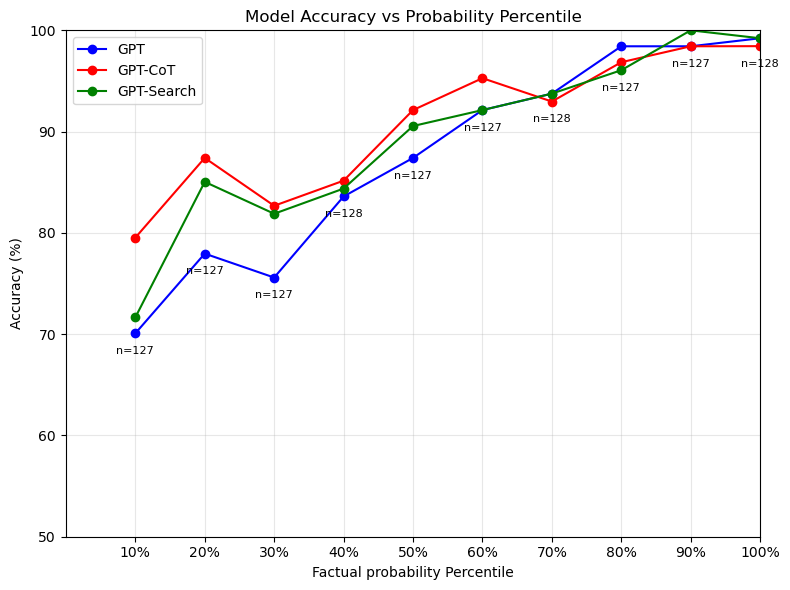


Numerical Results:
 percentile  n_samples factual_prob_range    GPT  GPT-CoT  GPT-Search
         10        127        0.196-0.621 70.079   79.528      71.654
         20        127        0.621-0.779 77.953   87.402      85.039
         30        127        0.780-0.886 75.591   82.677      81.890
         40        128        0.886-0.939 83.594   85.156      84.375
         50        127        0.940-0.972 87.402   92.126      90.551
         60        127        0.972-0.984 92.126   95.276      92.126
         70        128        0.984-0.991 93.750   92.969      93.750
         80        127        0.992-0.996 98.425   96.850      96.063
         90        127        0.996-0.998 98.425   98.425     100.000
        100        128        0.998-1.000 99.219   98.438      99.219


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort dataframe with lowest probabilities at the top
df_sorted = df.sort_values('probability_fact', ascending=True).reset_index(drop=True)

# Define percentile ranges (10, 20, ..., 90)
percentiles = range(10, 110, 10)

# Store results
results = []

for p in percentiles:
    # Calculate row indices for this percentile
    n_rows = len(df_sorted)
    start_idx = int(n_rows * (p-10)/100)
    end_idx = int(n_rows * p/100)
    
    # Get data for this percentile range
    df_slice = df_sorted.iloc[start_idx:end_idx]
    
    # Calculate accuracies
    accuracies = {
        'percentile': p,  # Store the end of the percentile range
        'n_samples': len(df_slice),
        'factual_prob_range': f"{df_slice['probability_fact'].min():.3f}-{df_slice['probability_fact'].max():.3f}",
        'GPT': 100 * (df_slice['gpt_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-CoT': 100 * (df_slice['gpt_cot_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-Search': 100 * (df_slice['gpt_search_predicted_choice'] == df_slice['true_label_choice']).mean()
    }
    results.append(accuracies)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot lines for each model
plt.plot(results_df['percentile'], results_df['GPT'], 'b-o', label='GPT')
plt.plot(results_df['percentile'], results_df['GPT-CoT'], 'r-o', label='GPT-CoT')
plt.plot(results_df['percentile'], results_df['GPT-Search'], 'g-o', label='GPT-Search')

# Customize the plot
plt.xlabel('Factual probability Percentile')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs Probability Percentile')
plt.grid(True, alpha=0.3)
plt.legend()

# Set axis limits
plt.xlim(0, 100)
plt.ylim(50, 100)

# Add x-axis ticks for each percentile
plt.xticks(results_df['percentile'], [f"{x}%" for x in results_df['percentile']])

# Optional: Add sample sizes as annotations
for i, row in results_df.iterrows():
    plt.annotate(f"n={row['n_samples']}", 
                (row['percentile'], min(row['GPT'], row['GPT-CoT'], row['GPT-Search'])),
                xytext=(0, -15), textcoords='offset points',
                ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print the numerical results
print("\nNumerical Results:")
print(results_df.round(3).to_string(index=False))

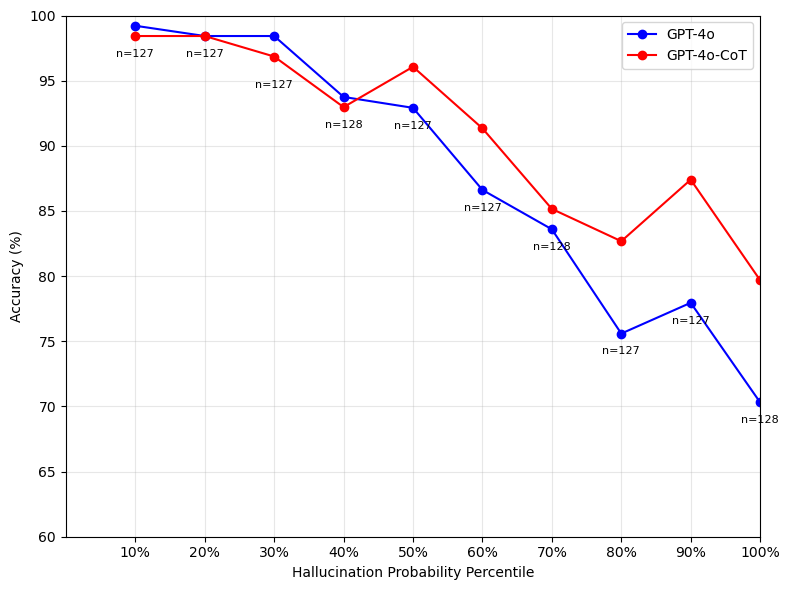


Numerical Results:
 percentile  n_samples hallucination_prob_range    GPT  GPT-CoT  GPT-Search
         10        127              0.000-0.002 99.213   98.425      99.213
         20        127              0.002-0.004 98.425   98.425     100.000
         30        127              0.004-0.008 98.425   96.850      96.063
         40        128              0.008-0.016 93.750   92.969      93.750
         50        127              0.016-0.028 92.913   96.063      92.913
         60        127              0.028-0.060 86.614   91.339      89.764
         70        128              0.060-0.113 83.594   85.156      84.375
         80        127              0.114-0.218 75.591   82.677      81.890
         90        127              0.220-0.378 77.953   87.402      85.039
        100        128              0.379-0.804 70.312   79.688      71.875


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort dataframe with highest probabilities at the top and compute hallucination probability
df_sorted = df.sort_values('probability_fact', ascending=False).reset_index(drop=True)
df_sorted['probability_hall'] = 1 - df_sorted['probability_fact']  # Compute hallucination probability

# Define percentile ranges (10, 20, ..., 90)
percentiles = range(10, 110, 10)

# Store results
results = []

for p in percentiles:
    # Calculate row indices for this percentile
    n_rows = len(df_sorted)
    start_idx = int(n_rows * (p-10)/100)
    end_idx = int(n_rows * p/100)
    
    # Get data for this percentile range
    df_slice = df_sorted.iloc[start_idx:end_idx]
    
    # Calculate accuracies
    accuracies = {
        'percentile': p,  # Store the end of the percentile range
        'n_samples': len(df_slice),
        'hallucination_prob_range': f"{df_slice['probability_hall'].min():.3f}-{df_slice['probability_hall'].max():.3f}",
        'GPT': 100 * (df_slice['gpt_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-CoT': 100 * (df_slice['gpt_cot_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-Search': 100 * (df_slice['gpt_search_predicted_choice'] == df_slice['true_label_choice']).mean()
    }
    results.append(accuracies)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot lines for each model
plt.plot(results_df['percentile'], results_df['GPT'], 'b-o', label='GPT-4o')
plt.plot(results_df['percentile'], results_df['GPT-CoT'], 'r-o', label='GPT-4o-CoT')
# plt.plot(results_df['percentile'], results_df['GPT-Search'], 'g-o', label='GPT-4o-CoT+context')

# Customize the plot
plt.xlabel('Hallucination Probability Percentile')
plt.ylabel('Accuracy (%)')
# plt.title('Model Accuracy vs Hallucination Probability Percentile')
plt.grid(True, alpha=0.3)
plt.legend()

# Set axis limits
plt.xlim(0, 100)
plt.ylim(60, 100)

# Add x-axis ticks for each percentile
plt.xticks(results_df['percentile'], [f"{x}%" for x in results_df['percentile']])

# Optional: Add sample sizes as annotations
for i, row in results_df.iterrows():
    plt.annotate(f"n={row['n_samples']}", 
                (row['percentile'], min(row['GPT'], row['GPT-CoT'], row['GPT-Search'])),
                xytext=(0, -15), textcoords='offset points',
                ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Print the numerical results
print("\nNumerical Results:")
print(results_df.round(3).to_string(index=False))

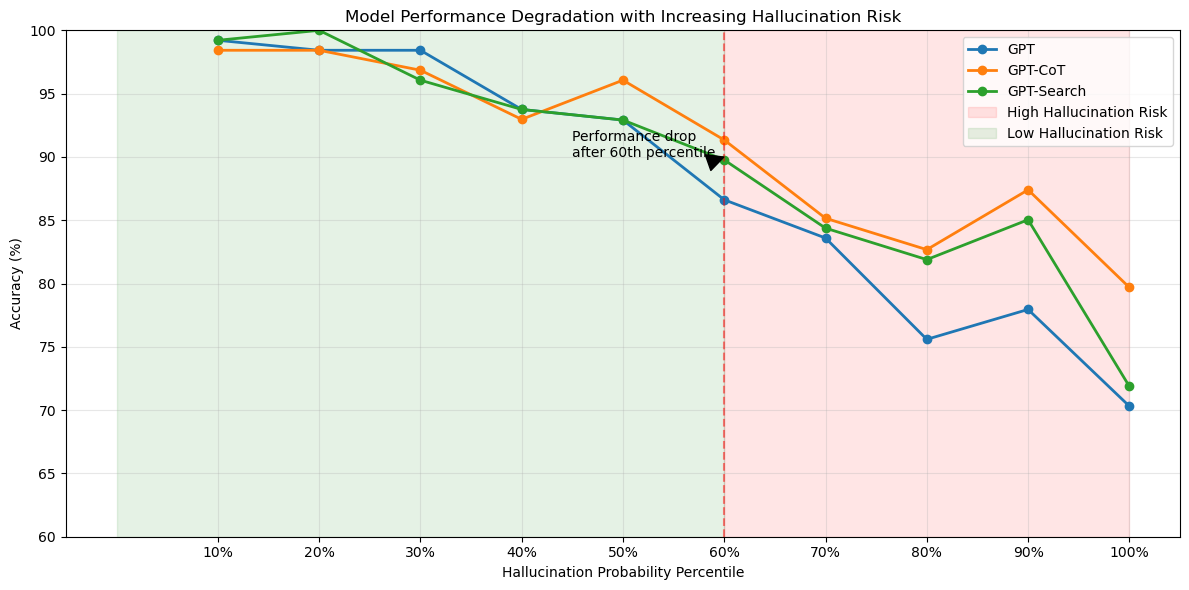

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Create the line plots
plt.plot(df['percentile'], df['GPT'], 'o-', label='GPT', linewidth=2)
plt.plot(df['percentile'], df['GPT-CoT'], 'o-', label='GPT-CoT', linewidth=2)
plt.plot(df['percentile'], df['GPT-Search'], 'o-', label='GPT-Search', linewidth=2)

# Add shaded regions to highlight different zones
plt.axvspan(60, 100, color='red', alpha=0.1, label='High Hallucination Risk')
plt.axvspan(0, 60, color='green', alpha=0.1, label='Low Hallucination Risk')

# Add vertical line at the threshold
plt.axvline(x=60, color='red', linestyle='--', alpha=0.5)

plt.xlabel('Hallucination Probability Percentile')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Degradation with Increasing Hallucination Risk')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(60, 100)  # Adjusted to focus on the relevant range
plt.xticks(df['percentile'], [f"{x}%" for x in df['percentile']])

# Add annotation
plt.annotate('Performance drop\nafter 60th percentile', 
            xy=(60, 90), xytext=(45, 90),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

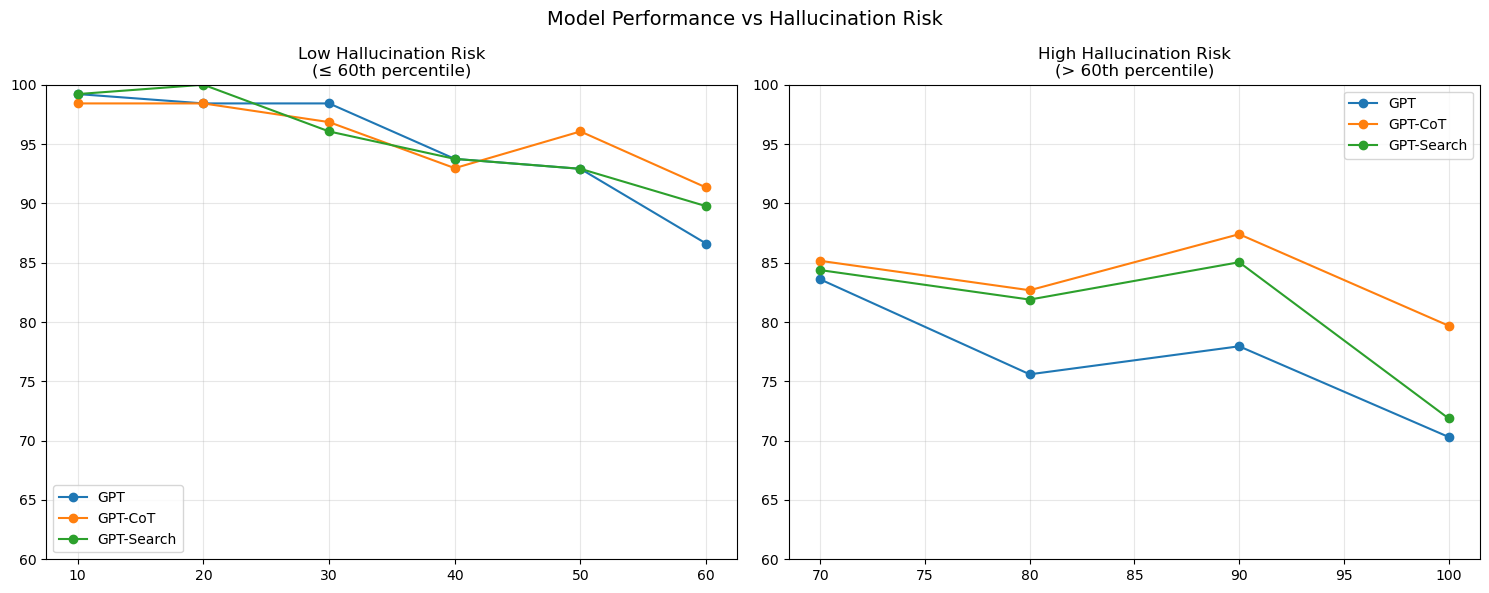

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Performance up to 60th percentile
low_risk = df[df['percentile'] <= 60]
ax1.plot(low_risk['percentile'], low_risk['GPT'], 'o-', label='GPT')
ax1.plot(low_risk['percentile'], low_risk['GPT-CoT'], 'o-', label='GPT-CoT')
ax1.plot(low_risk['percentile'], low_risk['GPT-Search'], 'o-', label='GPT-Search')
ax1.set_title('Low Hallucination Risk\n(≤ 60th percentile)')
ax1.set_ylim(60, 100)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right plot: Performance after 60th percentile
high_risk = df[df['percentile'] > 60]
ax2.plot(high_risk['percentile'], high_risk['GPT'], 'o-', label='GPT')
ax2.plot(high_risk['percentile'], high_risk['GPT-CoT'], 'o-', label='GPT-CoT')
ax2.plot(high_risk['percentile'], high_risk['GPT-Search'], 'o-', label='GPT-Search')
ax2.set_title('High Hallucination Risk\n(> 60th percentile)')
ax2.set_ylim(60, 100)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.suptitle('Model Performance vs Hallucination Risk', fontsize=14)
plt.tight_layout()
plt.show()

## Use P as treshold

In [24]:
import pandas as pd
import numpy as np

# First sort the dataframe
df_sorted = df.sort_values('probability_fact', ascending=False).reset_index(drop=True)

# Define probability thresholds (0.0, 0.1, ..., 1.0)
prob_thresholds = np.arange(0, 1.1, 0.1)

# Store results
results = []

for i in range(len(prob_thresholds)-1):
    lower_thresh = prob_thresholds[i]
    upper_thresh = prob_thresholds[i+1]
    
    # Get data for this probability range
    df_slice = df_sorted[
        (df_sorted['probability_fact'] >= lower_thresh) & 
        (df_sorted['probability_fact'] < upper_thresh)
    ]
    
    # Calculate accuracies
    accuracies = {
        'prob_range': f"{lower_thresh:.1f}-{upper_thresh:.1f}",
        'n_samples': len(df_slice),
        'GPT': (df_slice['gpt_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-CoT': (df_slice['gpt_cot_predicted_choice'] == df_slice['true_label_choice']).mean(),
        'GPT-Search': (df_slice['gpt_search_predicted_choice'] == df_slice['true_label_choice']).mean()
    }
    results.append(accuracies)

# Convert to DataFrame and format
results_df = pd.DataFrame(results)
results_df[['GPT', 'GPT-CoT', 'GPT-Search']] = results_df[['GPT', 'GPT-CoT', 'GPT-Search']].round(3)

# Print formatted table
print("\nAccuracy by Probability Range:")
print(results_df.to_string(index=False))

# Optional: Add correct predictions count
print("\nDetailed results with correct predictions:")
for i in range(len(prob_thresholds)-1):
    lower_thresh = prob_thresholds[i]
    upper_thresh = prob_thresholds[i+1]
    
    df_slice = df_sorted[
        (df_sorted['probability_fact'] >= lower_thresh) & 
        (df_sorted['probability_fact'] < upper_thresh)
    ]
    
    n_samples = len(df_slice)
    if n_samples > 0:  # Only print if there are samples in this range
        print(f"\nProbability range {lower_thresh:.1f}-{upper_thresh:.1f} (N={n_samples}):")
        for model in ['GPT', 'GPT-CoT', 'GPT-Search']:
            if model == 'GPT':
                col = 'gpt_predicted_choice'
            elif model == 'GPT-CoT':
                col = 'gpt_cot_predicted_choice'
            else:
                col = 'gpt_search_predicted_choice'
                
            correct = (df_slice[col] == df_slice['true_label_choice']).sum()
            acc = correct/n_samples if n_samples > 0 else 0
            print(f"{model}: {correct}/{n_samples} ({acc:.3f})")

# Optional: Save to CSV
results_df.to_csv('accuracy_by_probability.csv', index=False)


Accuracy by Probability Range:
prob_range  n_samples   GPT  GPT-CoT  GPT-Search
   0.0-0.1          0   NaN      NaN         NaN
   0.1-0.2          1 1.000    0.000       0.000
   0.2-0.3          4 0.750    1.000       1.000
   0.3-0.4         16 0.500    0.812       0.812
   0.4-0.5         33 0.667    0.758       0.606
   0.5-0.6         53 0.698    0.755       0.698
   0.6-0.7         69 0.783    0.884       0.826
   0.7-0.8         95 0.768    0.863       0.811
   0.8-0.9        135 0.778    0.844       0.844
   0.9-1.0        867 0.938    0.943       0.942

Detailed results with correct predictions:

Probability range 0.1-0.2 (N=1):
GPT: 1/1 (1.000)
GPT-CoT: 0/1 (0.000)
GPT-Search: 0/1 (0.000)

Probability range 0.2-0.3 (N=4):
GPT: 3/4 (0.750)
GPT-CoT: 4/4 (1.000)
GPT-Search: 4/4 (1.000)

Probability range 0.3-0.4 (N=16):
GPT: 8/16 (0.500)
GPT-CoT: 13/16 (0.812)
GPT-Search: 13/16 (0.812)

Probability range 0.4-0.5 (N=33):
GPT: 22/33 (0.667)
GPT-CoT: 25/33 (0.758)
GPT-Search: 20

In [26]:
import pandas as pd
import numpy as np

# First sort the dataframe
df_sorted = df.sort_values('probability_fact', ascending=False).reset_index(drop=True)

# Define probability thresholds (0.1, 0.2, ..., 1.0)
prob_thresholds = np.arange(0.2, 1.1, 0.1)

# Store results
results = []

for thresh in prob_thresholds:
    # Get all data below this threshold
    df_below = df_sorted[df_sorted['probability_fact'] < thresh]
    
    # Calculate accuracies if there are samples
    if len(df_below) > 0:
        accuracies = {
            'threshold': f"<{thresh:.1f}",
            'n_samples': len(df_below),
            'GPT': (df_below['gpt_predicted_choice'] == df_below['true_label_choice']).mean(),
            'GPT-CoT': (df_below['gpt_cot_predicted_choice'] == df_below['true_label_choice']).mean(),
            'GPT-Search': (df_below['gpt_search_predicted_choice'] == df_below['true_label_choice']).mean()
        }
    else:
        accuracies = {
            'threshold': f"<{thresh:.1f}",
            'n_samples': 0,
            'GPT': np.nan,
            'GPT-CoT': np.nan,
            'GPT-Search': np.nan
        }
    results.append(accuracies)

# Convert to DataFrame and format
results_df = pd.DataFrame(results)
results_df[['GPT', 'GPT-CoT', 'GPT-Search']] = results_df[['GPT', 'GPT-CoT', 'GPT-Search']].round(3)

# Print formatted table
print("\nAccuracy for samples below each probability threshold:")
print(results_df.to_string(index=False))

# Optional: Save to CSV
results_df.to_csv('accuracy_below_threshold.csv', index=False)


Accuracy for samples below each probability threshold:
threshold  n_samples   GPT  GPT-CoT  GPT-Search
     <0.2          1 1.000    0.000       0.000
     <0.3          5 0.800    0.800       0.800
     <0.4         21 0.571    0.810       0.810
     <0.5         54 0.630    0.778       0.685
     <0.6        107 0.664    0.766       0.692
     <0.7        176 0.710    0.812       0.744
     <0.8        271 0.731    0.830       0.768
     <0.9        406 0.746    0.835       0.793
     <1.0       1273 0.877    0.909       0.895
